<a href="https://colab.research.google.com/github/araldi/HS22_Big-Data-analysis-in-Biomedical-Research/blob/main/Week_07/12_Clustering_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means clustering

The K-means algorithm attempts to classify objects into a pre-determined number of clusters by finding optimal central points (called centroids) for each cluster. Each object is classifed as belonging the cluster represented by the closest centroid.



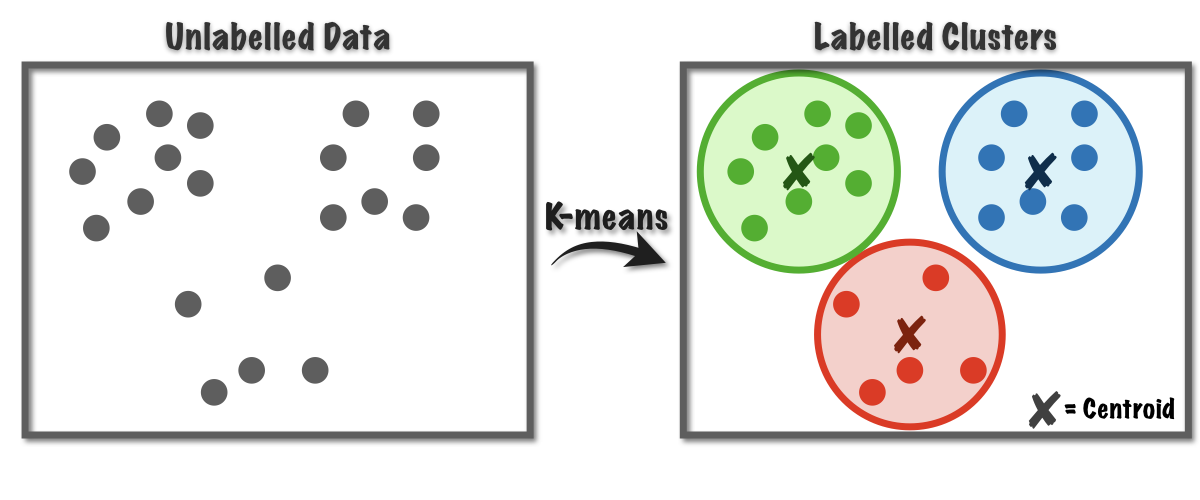

1. Pick K **random** objects as the initial cluster centers.
2. Classify each object into the cluster whose center is closest to the point.
3. For each cluster of classified objects, compute the centroid (mean).
4. Now reclassify each object using the centroids as cluster centers.
5. Calculate the total variance of the clusters (this is the measure of goodness).
6. Repeat steps 1 to 6 a few more times and pick the cluster centers with the lowest total variance.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl

## Iris flower dataset

It is a standard dataset from seaborn. It contains various measurements for 150 flowers belonging to 3 different species.

In [ ]:
iris_df = sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


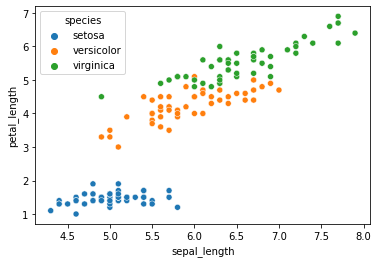

In [ ]:
sns.scatterplot(data=iris_df, x='sepal_length', y='petal_length', hue='species');

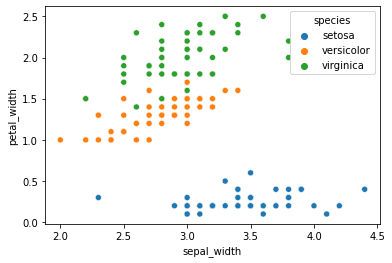

In [ ]:
sns.scatterplot(data=iris_df, x='sepal_width', y='petal_width', hue='species');

Let's cluster observations using numeric columns in the data.

In [ ]:
numeric_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
X = iris_df[numeric_cols]

We know that there are 3 species, therefore let's set 3 as the number of clusters that k-means should identify

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=2022, max_iter=5)
model.fit(X)

KMeans(max_iter=5, n_clusters=3, random_state=2022)

We can check the cluster centers for each cluster.

In [ ]:
model.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
model = KMeans(n_clusters=3, random_state=3, max_iter=2)
model.fit(X)
model.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

Classify points using the model.

In [ ]:
predictions = model.predict(X)
# (or use .labels_)

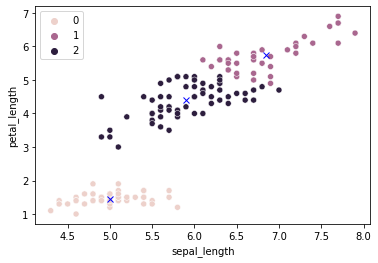

In [ ]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=predictions);
centers_x, centers_y = model.cluster_centers_[:,0], model.cluster_centers_[:,2]
plt.plot(centers_x, centers_y, 'xb')

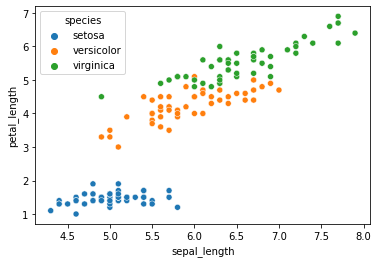

In [ ]:
sns.scatterplot(data=iris_df, x='sepal_length', y='petal_length', hue='species');

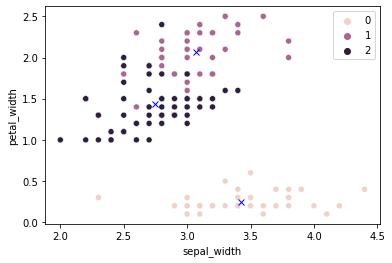

In [ ]:
sns.scatterplot(data=X, x='sepal_width', y='petal_width', hue=predictions);
centers_x, centers_y = model.cluster_centers_[:,1], model.cluster_centers_[:,3]
plt.plot(centers_x, centers_y, 'xb')

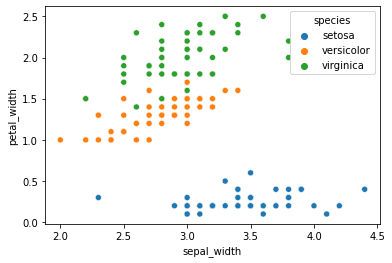

In [ ]:
sns.scatterplot(data=iris_df, x='sepal_width', y='petal_width', hue='species');

The K-means algorithm was able to classify (for the most part) different specifies of flowers into separate clusters. 


We can check the "goodness" of the fit by looking at model.inertia_, which contains the sum of squared distances of samples to their closest cluster center. Lower the inertia, better the fit.

In [ ]:
model.inertia_

78.851441426146

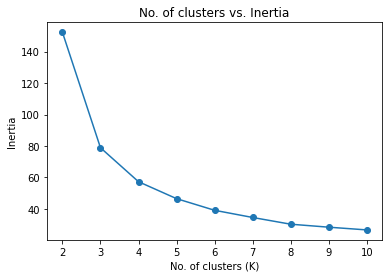

In [ ]:
options = range(2,11)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)
    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xlabel('No. of clusters (K)')
plt.ylabel('Inertia');

The chart is creates an "elbow" plot, and you can pick the number of clusters beyond which the reduction in inertia decreases sharply.



## Mall customers


Let's explore which types of customers visit a mall

In [18]:
mall = pd.read_csv("https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv")
mall.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Prepare the dataset

In [19]:
mall.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [20]:
# CustomerID column does not make sense and 
# Gender column needs to become binary
mall.drop(columns =['CustomerID'], inplace = True)

conditions = [mall['Gender'] == 'Male', mall['Gender'] == 'Female']
choices = [1, 0]
mall['Gender'] = np.select(conditions, choices)

In [21]:
mall

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


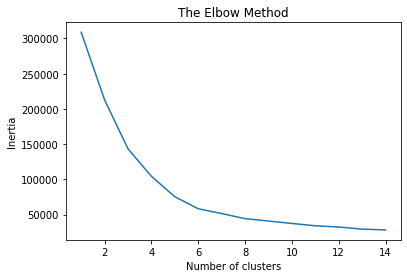

In [23]:
# calculate the inertia based on how many cluster to create
inertias = []
for i in range (1, 15):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(mall)
  inertias.append(kmeans.inertia_)
plt.plot(range(1,15), inertias)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [24]:
# Let's visualize 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++',  random_state=42)
y_kmeans= kmeans.fit_predict(mall)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [27]:
# these are the cluster centroids
kmeans.cluster_centers_

array([[ 0.52631579, 40.39473684, 87.        , 18.63157895],
       [ 0.40650407, 40.32520325, 44.15447154, 49.82926829],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513]])

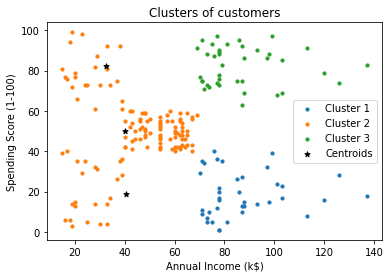

In [45]:
# plot the different clusters
plt.scatter(mall[y_kmeans == 0]['Annual Income (k$)'], mall[y_kmeans == 0]['Spending Score (1-100)'], s = 10,  label = 'Cluster 1')
plt.scatter(mall[y_kmeans == 1]['Annual Income (k$)'], mall[y_kmeans == 1]['Spending Score (1-100)'], s = 10,  label = 'Cluster 2')
plt.scatter(mall[y_kmeans == 2]['Annual Income (k$)'], mall[y_kmeans == 2]['Spending Score (1-100)'], s = 10, label = 'Cluster 3')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,3], s = 30, c = 'k', marker = '*', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

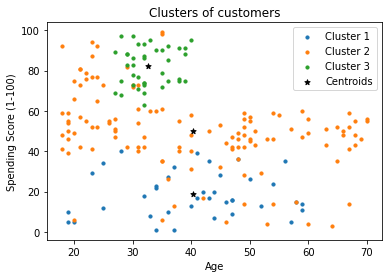

In [46]:
plt.scatter(mall[y_kmeans == 0]['Age'], mall[y_kmeans == 0]['Spending Score (1-100)'], s = 10,  label = 'Cluster 1')
plt.scatter(mall[y_kmeans == 1]['Age'], mall[y_kmeans == 1]['Spending Score (1-100)'], s = 10,  label = 'Cluster 2')
plt.scatter(mall[y_kmeans == 2]['Age'], mall[y_kmeans == 2]['Spending Score (1-100)'], s = 10, label = 'Cluster 3')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,3], s = 30, c = 'k', marker = '*', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Exercise

Does the gender affect the clustering of mall customers?

What happens if we cluster only based on Spending score and Income?


## Food nutrient content

This dataset contains the micro and macronutrients in foods.

How can we cluster the food based on the nutrient it contains?

In [ ]:
food = pd.read_csv('https://think.cs.vt.edu/corgis/datasets/csv/food/food.csv')

In [ ]:
food.sample(10)

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
911,Chicken,"Chicken, NS as to part, baked, broiled, or roa...",24102000,0,0,0,0.00,115,74.0,0.0,...,223,311,353,1.54,8,0.29,0.655,0.0,0.46,1.9
6839,Margarita mix,"Margarita mix, nonalcoholic",92512110,0,0,0,21.40,0,0.9,0.0,...,6,28,102,0.07,0,0.00,0.000,2.7,0.00,0.0
4217,Cereal,"Cereal, bran flakes",57207000,0,3,0,81.25,0,31.2,14.2,...,364,434,505,6.40,762,5.10,1.700,0.0,0.79,2.0
6378,Yogurt dressing,Yogurt dressing,83115000,0,37,0,11.80,58,15.0,0.1,...,85,146,43,0.46,208,0.29,0.040,2.4,0.47,1.7
4028,Buckwheat groats,"Buckwheat groats, fat added",56200510,0,28,0,18.99,0,19.6,2.6,...,67,85,174,0.58,38,0.00,0.246,0.0,1.06,6.5
3091,Pumpkin seeds,"Pumpkin seeds, NFS",43101050,1,5,0,14.71,0,63.0,6.5,...,1174,788,18,7.64,0,0.00,0.100,1.8,0.56,4.5
1874,Scallops and noodles with cheese sauce,Scallops and noodles with cheese sauce,27250110,0,8,0,15.05,32,31.0,0.6,...,171,109,313,0.94,28,0.47,0.053,0.2,0.11,0.3
2427,Frankfurter or hot dog sandwich,"Frankfurter or hot dog sandwich, NFS, plain, o...",27564010,0,0,0,18.25,41,27.3,0.8,...,123,269,742,1.74,2,0.58,0.103,0.0,0.43,1.3
5092,Grapefruit juice,"Grapefruit juice, 100%, freshly squeezed",61201010,2,4,1,9.20,0,7.7,0.1,...,15,162,1,0.05,1,0.00,0.044,38.0,0.22,0.0
29,Milk,"Milk, evaporated, fat free (skim)",11212050,0,0,0,11.35,4,25.2,0.0,...,195,332,115,0.90,118,0.24,0.055,1.2,0.00,0.0


In [ ]:
food.shape

(7083, 38)

In [ ]:
food.describe()

,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
count,7.083000e+03,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,...,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000
mean,4.884965e+07,43.759283,255.363405,4.862346,20.828039,34.458845,34.440802,1.703840,213.351687,263.571933,...,133.088945,217.127488,340.503459,1.281451,73.139065,0.705177,0.197528,5.696216,1.086955,14.206607
std,2.425159e+07,259.520139,995.709951,38.047657,21.887363,77.479105,43.901497,2.558168,1015.888615,1161.245139,...,126.498700,204.812523,350.333632,2.917233,241.913126,2.502821,0.374608,15.548490,3.133890,54.944096
min,1.100000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.715077e+07,0.000000,0.000000,0.000000,5.650000,0.000000,10.000000,0.100000,0.000000,0.000000,...,48.000000,111.000000,124.000000,0.360000,2.000000,0.000000,0.052000,0.000000,0.230000,0.800000
50%,5.326020e+07,0.000000,8.000000,0.000000,13.300000,8.000000,19.600000,1.000000,18.000000,0.000000,...,102.000000,183.000000,313.000000,0.680000,20.000000,0.180000,0.110000,0.700000,0.550000,3.800000
75%,6.720345e+07,1.000000,73.000000,1.000000,26.195000,46.000000,44.200000,2.100000,81.000000,0.000000,...,189.000000,270.500000,454.000000,1.360000,61.000000,0.550000,0.203000,5.300000,1.110000,9.300000
max,9.999821e+07,4655.000000,14134.000000,1922.000000,100.000000,3074.000000,820.200000,46.200000,15643.000000,45902.000000,...,1429.000000,6040.000000,7851.000000,98.860000,9363.000000,82.440000,12.000000,560.000000,149.400000,1640.000000


In [ ]:
food['Category'].value_counts()

Infant formula                          173
Rice                                    143
Bread                                   119
Potato                                  105
Cookie                                  100
                                       ... 
Layer dip                                 1
Bean dip                                  1
Refried beans with meat                   1
Black bean salad                          1
Industrial oil as ingredient in food      1
Name: Category, Length: 2429, dtype: int64

#### Prepare the data

In [ ]:
# data is not in a homogenous unit of measure. The food below are in milligrams or micrograms --> adjusted
mcg = ['Data.Alpha Carotene',
'Data.Beta Carotene',
'Data.Beta Cryptoxanthin',
'Data.Lutein and Zeaxanthin',
'Data.Lycopene',
'Data.Retinol',
'Data.Selenium',
'Data.Vitamins.Vitamin A - RAE',
'Data.Vitamins.Vitamin B12',
'Data.Vitamins.Vitamin K']



mg = ['Data.Cholesterol',
'Data.Choline',
'Data.Niacin',
'Data.Riboflavin',
'Data.Thiamin',
'Data.Major Minerals.Calcium',
'Data.Major Minerals.Copper',
'Data.Major Minerals.Iron',
'Data.Major Minerals.Magnesium',
'Data.Major Minerals.Phosphorus',
'Data.Major Minerals.Potassium',
'Data.Major Minerals.Sodium',
'Data.Major Minerals.Zinc',
'Data.Vitamins.Vitamin B6',
'Data.Vitamins.Vitamin C',
'Data.Vitamins.Vitamin E']

food_ML[mg] = food_ML[mg] / 1000
food_ML[mcg] = food_ML[mcg] / 1000000

In [ ]:
# remove the columns not necessary for machine learning
food_ML = food.drop(columns = ['Category', 'Description' , 'Nutrient Data Bank Number'])


# food_ML = skl.preprocessing.scale(food_ML, axis=0)  ### WHAT HAPPENS IF WE STANDARDIZE?


In [ ]:
food_ML

,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Niacin,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,0,7,0,6.89,14,16.0,0.0,0,0,0.177,...,14,51,17,0.17,61,0.05,0.011,5.0,0.08,0.3
1,0,4,0,4.87,8,17.9,0.0,0,0,0.110,...,103,157,39,0.42,59,0.56,0.060,0.1,0.03,0.2
2,0,7,0,4.67,12,17.8,0.0,0,0,0.105,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
3,0,7,0,4.46,14,16.0,0.0,0,0,0.043,...,86,253,3,0.38,29,0.36,0.034,0.9,0.08,0.3
4,0,7,0,4.67,12,17.8,0.0,0,0,0.105,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7078,103,464,0,5.48,0,7.4,1.6,142,2597,0.637,...,30,278,6,0.21,43,0.00,0.104,18.2,0.60,8.8
7079,1,11,0,4.81,0,19.4,1.4,18,0,3.678,...,96,364,6,0.58,1,0.04,0.123,6.3,0.03,0.4
7080,368,994,0,11.60,0,14.6,2.2,225,458,0.773,...,46,312,19,0.28,98,0.00,0.177,16.2,0.24,8.9
7081,0,194,4,17.14,13,20.0,0.6,112,7237,0.917,...,33,190,845,0.21,21,0.04,0.104,2.5,1.90,50.8


In [ ]:
# check if there is correlation across features
# do not run, it takes 24 minutes!

sns.pairplot(food_ML, plot_kws={"s": 3})

# but there are no discernible correlations

### Find optimal number of clusters


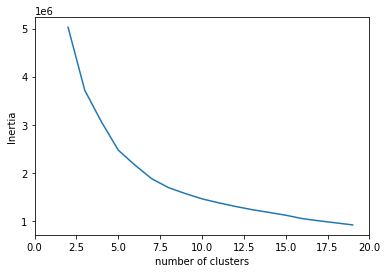

In [ ]:

np.random.seed(2022)
tv = []
for i in range(2, 20):
    km = KMeans(n_clusters=i).fit(food_ML)
    tv.append(km.inertia_)
    
plt.plot(range(2,20), tv)
plt.xlim(0,20)
plt.xlabel("number of clusters")
plt.ylabel("Inertia");

Also here, the optimal number of clusters is somewhere between 3 and 5. Let's see with 3 groups first.

### Cluster

In [ ]:
Nclust = 3
from sklearn import cluster
foodclustersKM = cluster.KMeans(n_clusters=Nclust).fit(food_ML)


In [ ]:
foodclustersKM.labels_

array([0, 0, 0, ..., 0, 2, 2], dtype=int32)

In [ ]:
#assign cluster labels to data
food['Cluster'] = foodclustersKM.labels_

### Verify the clusters

In [ ]:
food[['Data.Protein', 'Data.Carbohydrate', 'Data.Fat.Total Lipid', 'Data.Fiber', 'Data.Water', 'Cluster']]

,Data.Protein,Data.Carbohydrate,Data.Fat.Total Lipid,Data.Fiber,Data.Water,Cluster
0,1.03,6.89,4.38,0.0,87.50,0
1,3.34,4.87,1.99,0.0,89.04,0
2,3.28,4.67,3.20,0.0,88.10,0
3,3.10,4.46,3.46,0.0,88.20,0
4,3.28,4.67,3.20,0.0,88.10,0
...,...,...,...,...,...,...
7078,1.11,5.48,0.23,1.6,92.57,0
7079,3.46,4.81,0.38,1.4,90.37,0
7080,1.81,11.60,0.19,2.2,85.59,0
7081,1.34,17.14,22.85,0.6,55.97,2


In [ ]:
food['Cluster'].value_counts()

0    3996
2    2048
1    1039
Name: Cluster, dtype: int64

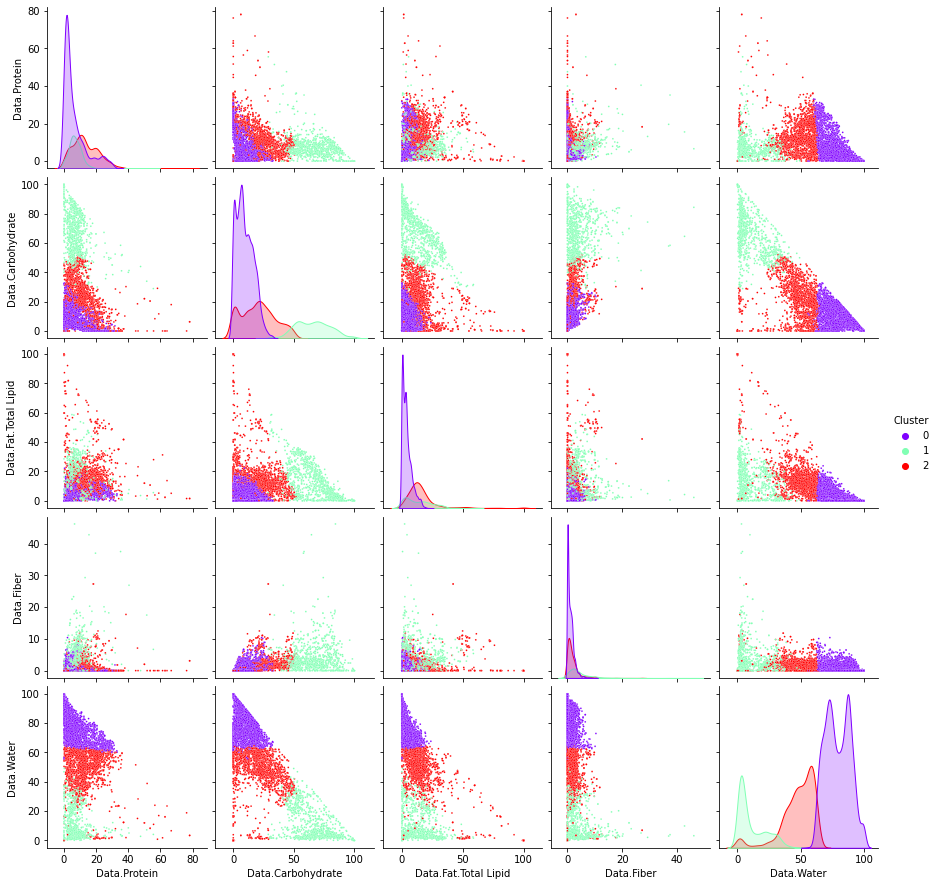

In [ ]:
data = food[['Data.Protein', 'Data.Carbohydrate', 'Data.Fat.Total Lipid', 'Data.Fiber', 'Data.Water','Cluster']]
sns.pairplot(data, hue='Cluster', palette="rainbow", plot_kws={"s": 3})

### Exercise

Choose the most representative scatterplot/histplot to show how the three clusters differ (with new scatterplots/histplot).

Any guesses on which are the food categories?

What happens if you scale the data before clustering?

What happens if you cluster not based on macroelements mainly (Carbs, fats, proteins, water, but based on selected micronutrients). Try clustering only on micronutrients (determine the most appropriate number of clusters, then show the clustering results and take a guess on what the clusters represent). Cluster separately for vitamins/other micronutrients and for trace minerals.